<div class="frontmatter text-center">
<img src="jupyter-sq-text.svg" width="200px"/>
<h1> Jupyter Notebooks<br>as tools for reproducible research<br></h1>
<h3> Min Ragan-Kelley<br><a href="https://github.com/minrk">@minrk</a></h3>
<h4> NetSci 2015 </h4>
https://github.com/minrk/netsci15
</div>

# What is Jupyter?

- A collection of tools for interactive computing
- A protocol
- Over 40 languages supported **by the community**
  - Python
  - Julia
  - R
  - Javascript
  - Ruby
  - C++
  - Scala
  - [more...](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages)


In [1]:
import time, sys
for i in range(10):
    time.sleep(0.1 * i)
    print(i, end=' ')
    sys.stdout.flush()

0 1 2 3 4 5 6 7 8 9 

In [2]:
import socket
socket.gethostname()

'Horus.local'

In [3]:
!pwd

/Users/minrk/dev/ip/pres/netsci15


# What is a Jupyter Notebook?

## Jupyter Notebook: Web-based interactive environment

In [40]:
import numpy as np
p = np.polynomial.Polynomial([1,2,3], [-10, 10])
p

Polynomial([ 1.,  2.,  3.], [-10.,  10.], [-1,  1])

Rich media support for output:

- latex
- jpeg/png/svg
- html+javascript


In [82]:
def poly_to_latex(p):
    """Render a numpy Polynomial object as a Latex expression"""
    terms = ['%.2g' % p.coef[0]]
    if len(p) > 1:
        term = 'x'
        c = p.coef[1]
        if c!=1:
            term = ('%.2g ' % c) + term
        terms.append(term)
    if len(p) > 2:
        for i in range(2, len(p)):
            term = 'x^%d' % i
            c = p.coef[i]
            if c!=1:
                term = ('%.2g ' % c) + term
            terms.append(term)
    px = '$P(x)=%s$' % '+'.join(terms)
    dom = r', $x \in [%.2g,\ %.2g]$' % tuple(p.domain)
    return px+dom

from IPython.display import Latex
Latex(poly_to_latex(p))

<IPython.core.display.Latex object>

In [83]:
from IPython.display import Image
Image(url="jupyter-sq-text.svg")

### Interactive exploration with widgets

Factoring $x^n-1$ with [sympy](http://www.sympy.org/)

In [84]:
from IPython.html.widgets import interact
from IPython.display import display

from sympy import Symbol, Eq, factor, init_printing
init_printing(use_latex='mathjax')
x = Symbol('x')

@interact(n=(2,40))
def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

 21               ⎛ 2        ⎞ ⎛ 6    5    4    3    2        ⎞ ⎛ 12    11    
x   - 1 = (x - 1)⋅⎝x  + x + 1⎠⋅⎝x  + x  + x  + x  + x  + x + 1⎠⋅⎝x   - x   + x

9    8    6    4    3        ⎞
  - x  + x  - x  + x  - x + 1⎠

Different widgets for different argument types:

In [85]:
from pprint import pprint

@interact(b=True, i=5, f=4.5, text="hello")
def show_args(**kwargs):
    pprint(kwargs)


{'b': True, 'f': 4.5, 'i': 5, 'text': 'hello'}


## Jupyter Notebook: document format

In [86]:
%run utils
show_ipynb("NetSci 2015.ipynb", limit=20)


### Input and output together with prose and maths

#### Maxwell's Equations

[ Maxwell's equations](http://es.wikipedia.org/wiki/Ecuaciones_de_Maxwell) govern electromagnetic fields.


\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{align}


This enables conneting mathematical analysis with implementation and illustration. For instance:

\begin{align}
e^{i \omega t} = \cos(\omega t) + i \sin(\omega t)
\end{align}

which we can illustrate visually by plotting the left- and right-hand side:

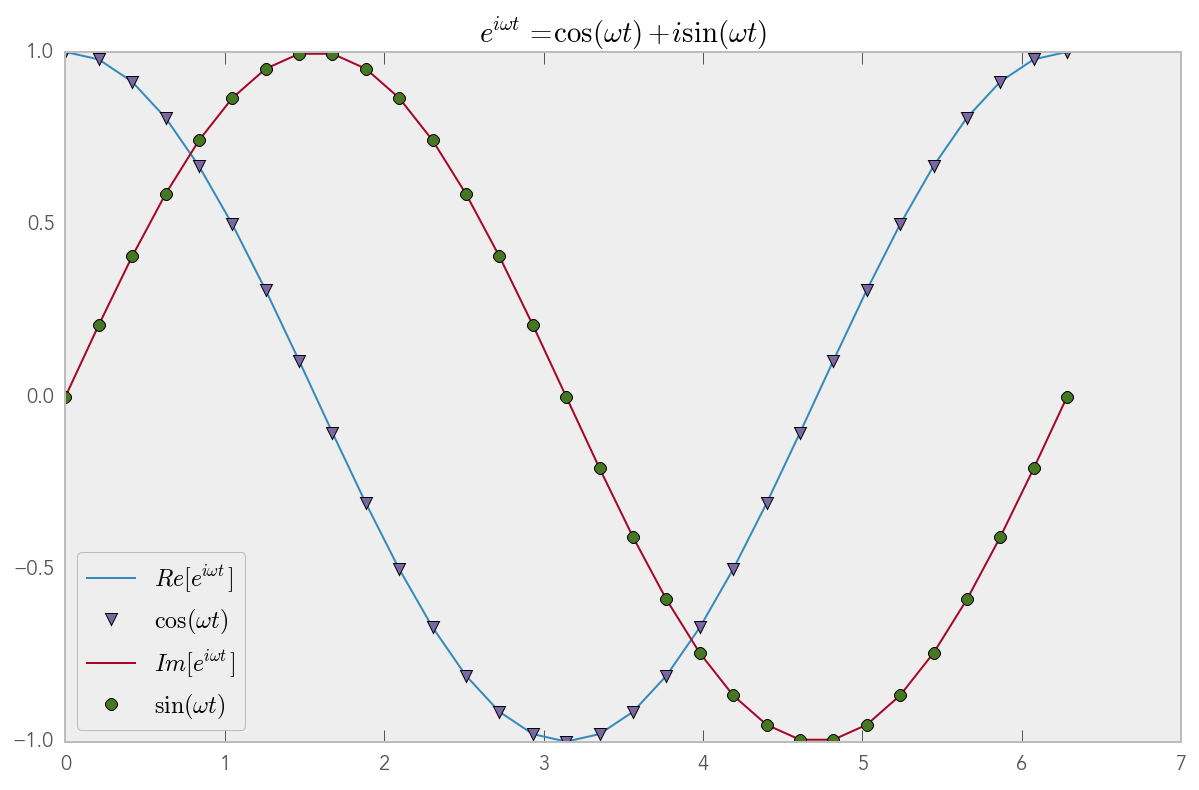

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np

ω = 1
ωt = np.linspace(0,2 * np.pi, 31 * ω)
e_iωt = np.e ** (1j * ωt)

plt.plot(ωt, e_iωt.real, label="$Re[e^{i \omega t}]$")
plt.plot(ωt, np.cos(ωt), 'v', label="$\cos(\omega t)$")
plt.plot(ωt, e_iωt.imag, label="$Im[e^{i \omega t}]$")
plt.plot(ωt, np.sin(ωt), 'o', label="$\sin(\omega t)$")
plt.title("$e^{i \omega t} = \cos(\omega t) + i \sin(\omega t)$")
plt.legend(loc=0);

# Notebooks for reproducibility

Two basic ways notebooks can help in a reproducible science context.

## 1. Notebooks as *notebooks*

- **audience:** self, collaborators
- interactive scratchpad
- record of ideas and explorations
- messy


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.array([np.cumsum(np.random.random(1000) - 0.5) for i in range(3) ]).T

df = pd.DataFrame(data, columns=list('ABC'))
df.head()

,A,B,C
0,0.286183,0.218683,0.310078
1,0.067731,0.710428,0.533085
2,0.400283,0.804363,0.816007
3,0.522857,0.707281,0.540133
4,0.322080,0.842592,0.536723


In [9]:
df.mean()

A    5.213460
B    7.579589
C   -4.532354
dtype: float64

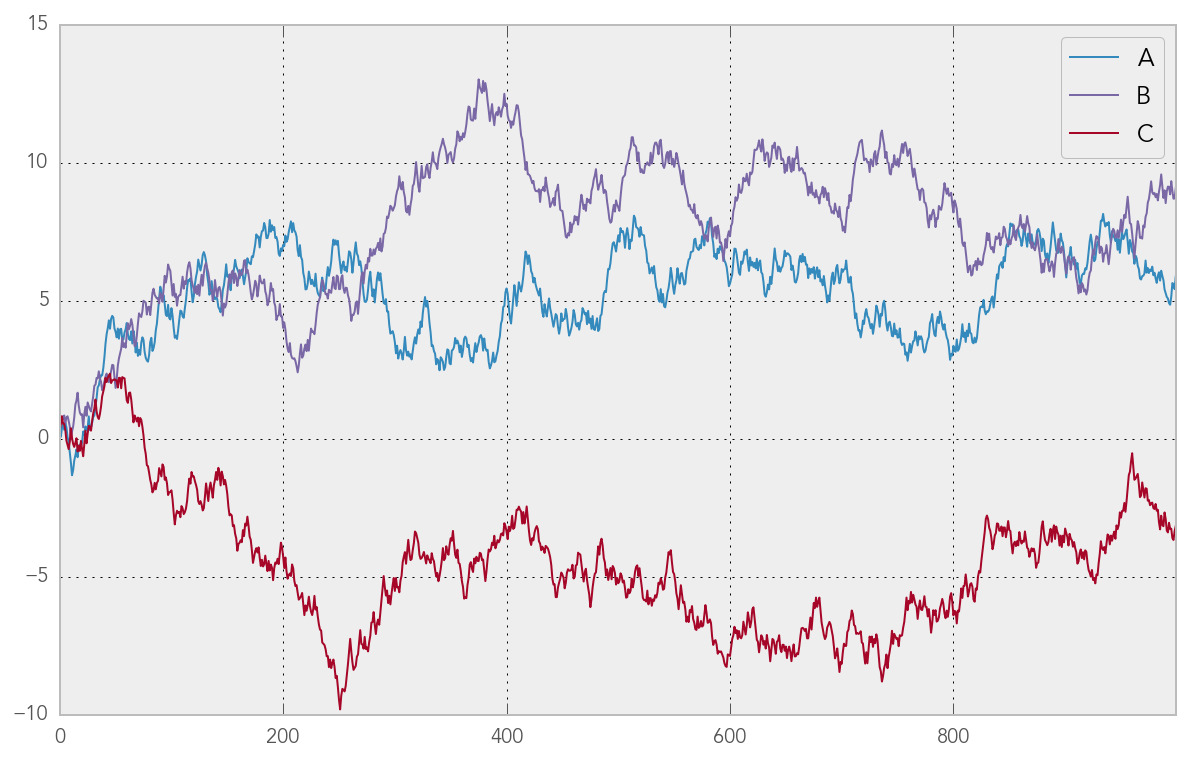

In [69]:
df.plot()

We can smooth with a sliding window using `np.convolve`

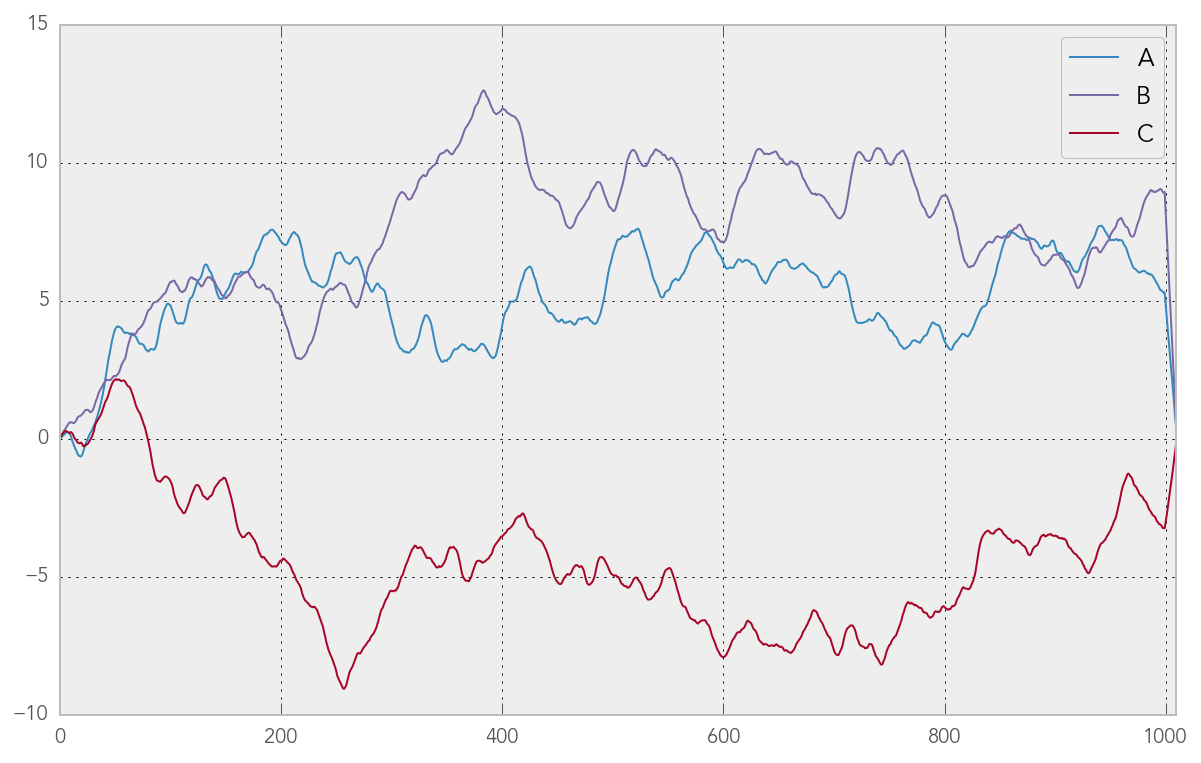

In [90]:
n = 11
window = np.ones(n)
A_smooth = np.convolve(df.A, window) / n
B_smooth = np.convolve(df.B, window) / n
C_smooth = np.convolve(df.C, window) / n
smooth_data = np.array([A_smooth, B_smooth, C_smooth]).T
df_smooth = pd.DataFrame(smooth_data,
    columns=list('ABC'))
df_smooth.plot()

In [72]:
pd.rolling_mean?

Docstring:
Moving mean.

Parameters
----------
arg : Series, DataFrame
window : int
    Size of the moving window. This is the number of observations used for
    calculating the statistic.
min_periods : int, default None
    Minimum number of observations in window required to have a value
    (otherwise result is NA).
freq : string or DateOffset object, optional (default None)
    Frequency to conform the data to before computing the statistic. Specified
    as a frequency string or DateOffset object.
center : boolean, default False
    Set the labels at the center of the window.
how : string, default 'None'
    Method for down- or re-sampling

Returns
-------
y : type of input argument

Notes
-----
By default, the result is set to the right edge of the window. This can be
changed to the center of the window by setting ``center=True``.

The `freq` keyword is used to conform time series data to a specified
frequency by resampling the data. This is done with the default parameters
of :

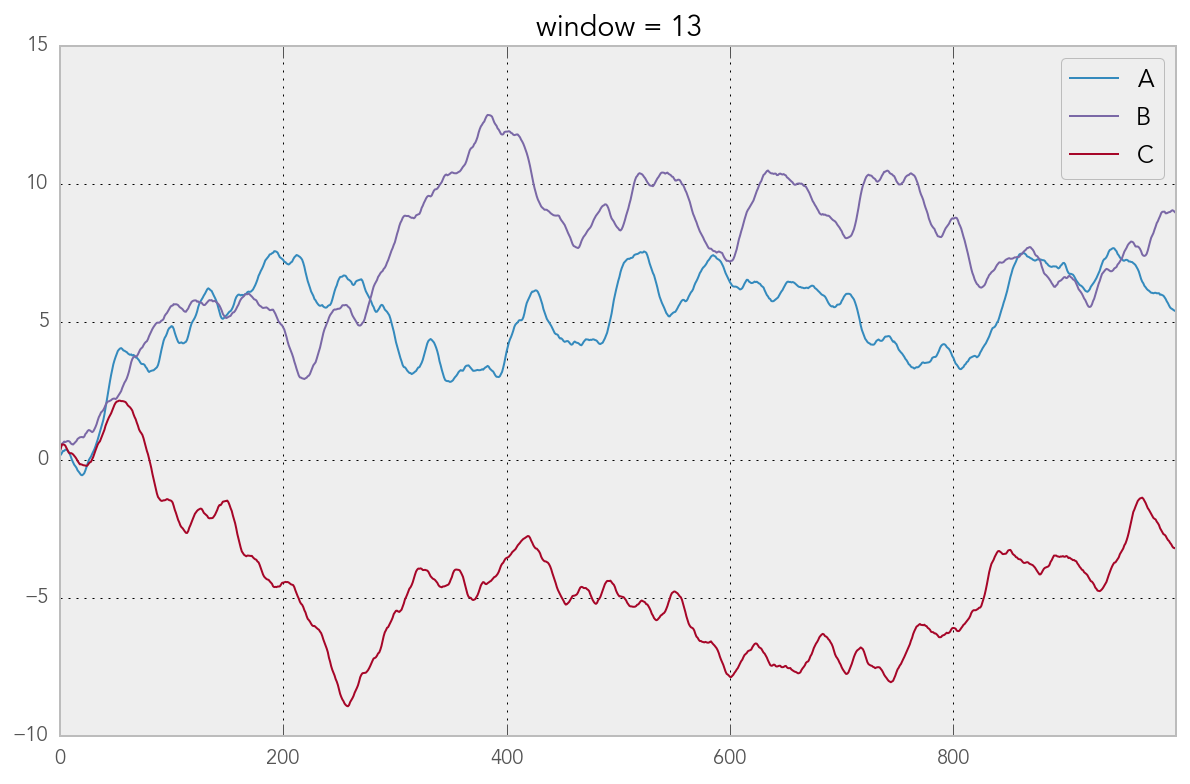

In [91]:
@interact
def plot_rolling_mean(window=(0,50)):
    pd.rolling_mean(df, window, min_periods=1).plot()
    plt.title("window = %i" % window)


#### Example

An [actual notebook from my dissertation](example-weighting.ipynb) in 2012.

## 2. Notebooks as publication products

- **audience:** public
- Prepare analysis for public consumption
- Export to html or other format for distribution


Since notebooks contain input, output, and prose, they can provide a complete, reproducible narrative that describes and performs analysis. [nbviewer](http://nbviewer.org) provides on-demand HTML rendering of any notebook on the web.

### Success stories

- [Science](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#reproducible-academic-publications)
  - [Collaborative cloud-enabled tools allow rapid, reproducible biological insights](http://www.nature.com/ismej/journal/v7/n3/full/ismej2012123a.html)
- Blogging
  - [Jake Vanderplas](https://jakevdp.github.io/)
  - [Peter Norvig](http://nbviewer.ipython.org/url/norvig.com/ipython/TSPv3.ipynb)
  - [nikola](http://getnikola.com)
- [Books](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#entire-books-or-other-large-collections-of-notebooks-on-a-topic)
  - [Signal Processing](http://nbviewer.ipython.org/github/unpingco/Python-for-Signal-Processing/tree/master/)
  - [Bayesian Methods](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb)
- Journalism
  - [Scientific American](http://blogs.scientificamerican.com/sa-visual/visualizing-4-dimensional-asteroids1/)
  - [Five Thirty-Eight](http://nbviewer.ipython.org/github/brianckeegan/Bechdel/blob/master/Bechdel_test.ipynb)
  - [New York Times](https://twitter.com/13pt/statuses/324951796781043713) graphics:
    <blockquote class="twitter-tweet" lang="en"><p lang="en" dir="ltr">That Kepler graphic was my first try using ipython+pandas and coffeescript+d3 in the same project. <a href="http://t.co/Dl4aFdC7AF">http://t.co/Dl4aFdC7AF</a></p>&mdash; Jonathan Corum (@13pt) <a href="https://twitter.com/13pt/status/324951796781043713">April 18, 2013</a></blockquote>

- [more...](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

By converting to standard formats such as HTML, latex, or markdown, Notebooks can be integrated into existing publication pipelines, for web or print.

# Exporting Notebooks

`nbconvert` is a tool for converting notebooks to other formats,
such as html, markdown, latex, and restructured text.
It is extensible and fully customizable via jinja templates.

In [81]:
!ipython nbconvert --to markdown "NetSci 2015" 2>/dev/null
!head -n 24 "NetSci 2015.md"


<div class="frontmatter text-center">
<img src="jupyter-sq-text.svg" width="200px"/>
<h1> Jupyter Notebooks<br>as tools for reproducible research<br></h1>
<h3> Min Ragan-Kelley<br><a href="https://github.com/minrk">@minrk</a></h3>
<h4> NetSci 2015 </h4>
</div>

# What is Jupyter?

- A collection of tools for interactive computing
- A protocol
- Over 40 languages supported **by the community**
  - Python
  - Julia
  - R
  - Javascript
  - Ruby
  - C++
  - Scala
  - [more...](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages)





In [24]:
!markdown "NetSci 2015.md" > netsci.html
display_html('<a href="netsci.html" target=_blang>nb-md-html export</a>', raw=True)

nb-md-html export

In addition to nbconvert, the Jupyter community has developed
tools for authoring notebooks in other formats.

- **RMarkdown**
- [**ipymd**](https://github.com/rossant/ipymd): notebooks as markdown files, for O'Reilly Atlas.
- [**Notedown**](https://github.com/aaren/notedown): Like RMarkdown, for notebooks
- [**dexy**](http://dexy.it): workflow-based document construction

# Jupyter Services

- [try.jupyter.org](https://try.jupyter.org) - try Jupyter out
- [nbviewer](http://nbviewer.org) - share / view notebooks

In [97]:
# add some style
from IPython.display import display_html
with open('pres.css') as f:
    display_html("<style type='text/css'>%s</style>" % f.read(), raw=True)
embed_css()

In [78]:
%%html
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>